In [114]:
from numpy import inf
import copy
import matplotlib.pylab as plt


In [126]:
graph = {'A' : {'B': 686, 'I': 332, 'P': 554}, 'B': {'C': 148, 'D': 337}, 'C': {'B': 148},
         'D': {'B': 337, 'E': 228, 'H': 221}, 'E': {'D': 228, 'F': 172, 'K': 281},
         'F': {'E': 172, 'G': 333, 'L': 263}, 'G': {'F': 333}, 'H': {'D': 221, 'I': 331, 'J': 113},
         'I': {'A': 332, 'H': 331, 'J': 197, 'M': 295}, 'J': {'H': 113, 'I': 197, 'K': 118},
         'K': {'E': 281, 'J': 118, 'L': 165}, 'L': {'F': 263, 'K': 165, 'M': 115, 'N': 206},
         'M': {'I': 295, 'L': 115, 'O': 186, 'P': 173}, 'N': {'L': 206, 'O': 202, 'Q': 164},
         'O': {'M': 186, 'N': 202, 'P': 327}, 'P': {'A': 554, 'M': 173, 'O': 327}, 'Q': {'N': 164}}
graph2 = {'A': {'C': 5, 'D': 1, 'E': 2}, 'B': {'H': 1, 'G': 3}, 'C': {'I': 2, 'D': 3, 'A': 5},
         'D': {'C': 3, 'A': 1, 'H': 2}, 'E': {'A': 2, 'F': 3},
         'F': {'E': 3, 'G': 1}, 'G': {'F': 1, 'B': 3, 'H': 2}, 'H': {'I': 2, 'D': 2, 'B': 1, 'G': 2},
         'I': {'C': 2, 'H': 2}}

unvisited = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'}

heuristic = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0}

dist_list = {'A': 0, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf, 'G': inf, 'H': inf, 'I': inf, 'J': inf, 'K': inf, 'L': inf, 'M': inf, 'N': inf, 'O': inf, 'P': inf, 'Q': inf}
dist_list2 = {'A': 0, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf, 'G': inf, 'H': inf, 'I': inf}

last_neighbors = {}

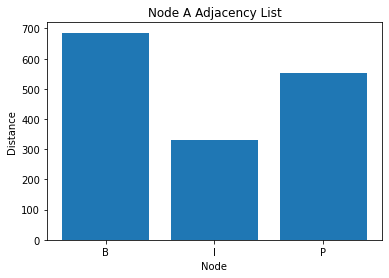

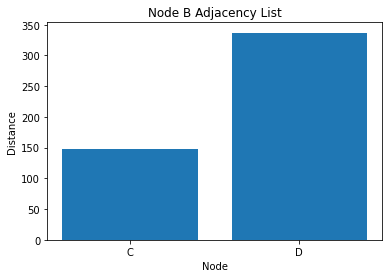

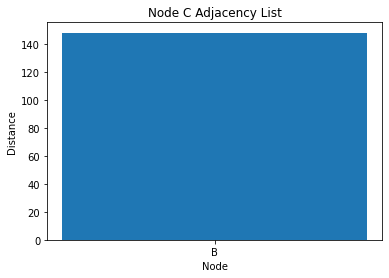

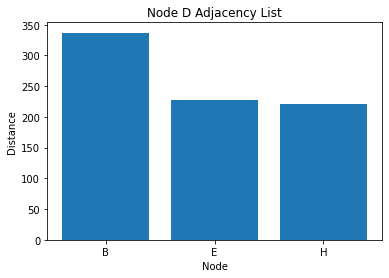

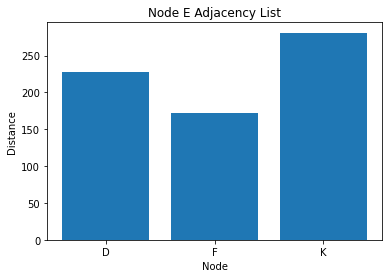

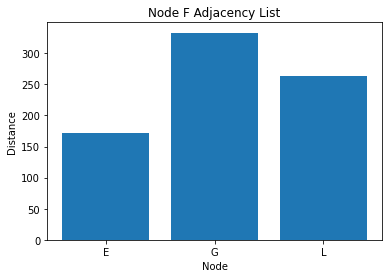

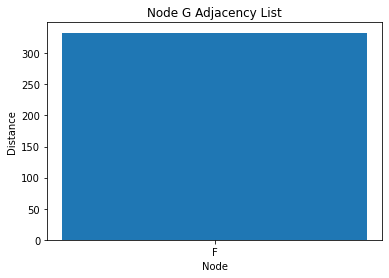

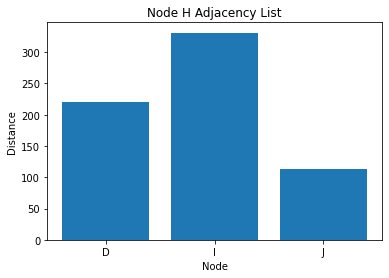

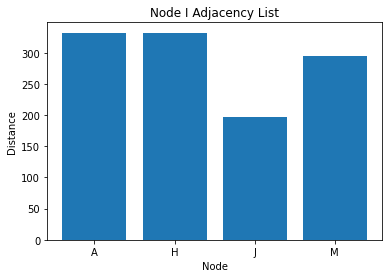

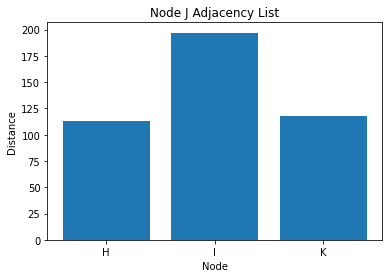

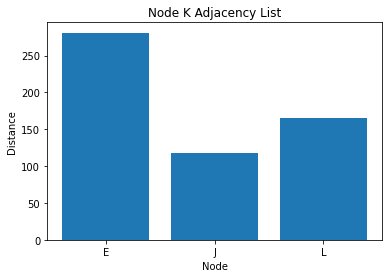

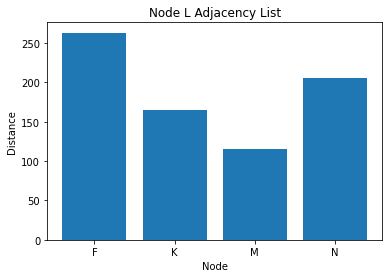

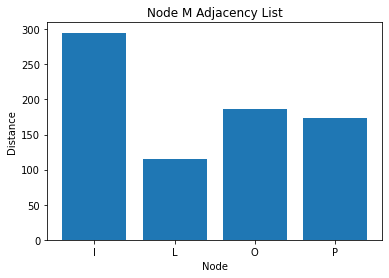

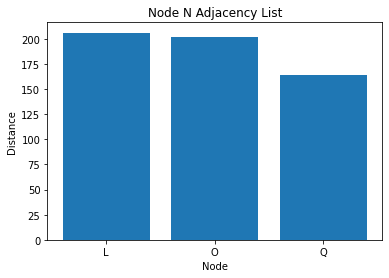

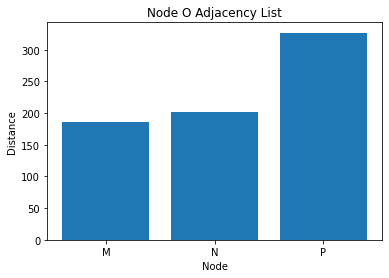

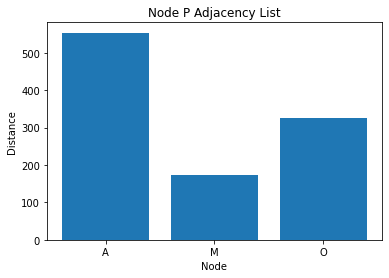

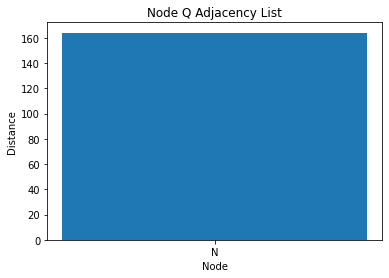

In [116]:
for node in graph:
    myList = graph[node].items()
    x, y = zip(*myList)
    plt.bar(x, y)
    plt.xlabel('Node')
    plt.ylabel('Distance')
    plt.title('Node {} Adjacency List'.format(node))
    plt.show()


In [117]:
def dijkstra_search(start, graph, dist_list, last_neighbors):
    currNode = start

    ref_list = copy.deepcopy(dist_list)
    last_neighbor = {}

    while len(ref_list) > 0:
        for adj in graph[currNode]:
            if graph[currNode][adj] + dist_list[currNode] < dist_list[adj]:
                dist_list[adj] = graph[currNode][adj] + dist_list[currNode]
                ref_list[adj] = dist_list[adj]
                last_neighbors[adj] = currNode

        del ref_list[currNode]

        if len(ref_list) > 0:
            currNode = min(ref_list, key = ref_list.get)

In [118]:
def shortestPath(start, end, last_neighbors):

    path = []
    temp = end
    path.append(temp)

    while temp != start:
        temp = last_neighbors[temp]
        path.append(temp)

    path.reverse()

    return path

In [119]:
dijkstra_search('A', graph, dist_list, last_neighbors)
print(dist_list)
print(last_neighbors)
print(shortestPath('A', 'Q', last_neighbors))

{'A': 0, 'B': 686, 'C': 834, 'D': 863, 'E': 928, 'F': 1005, 'G': 1338, 'H': 642, 'I': 332, 'J': 529, 'K': 647, 'L': 742, 'M': 627, 'N': 948, 'O': 813, 'P': 554, 'Q': 1112}
{'B': 'A', 'I': 'A', 'P': 'A', 'H': 'J', 'J': 'I', 'M': 'I', 'K': 'J', 'O': 'M', 'L': 'M', 'D': 'H', 'E': 'K', 'C': 'B', 'F': 'L', 'N': 'L', 'Q': 'N', 'G': 'F'}
['A', 'I', 'M', 'L', 'N', 'Q']


In [120]:
def dfs(target, graph, heuristic, unvisited):
    unvisited.remove(target)
    for adj in graph[target]:
        if adj in unvisited:
            heuristic[adj] = graph[target][adj] + heuristic[target]
            dfs(adj, graph, heuristic, unvisited)

In [125]:
def astar(start, end, graph, last_neighbors, heuristic):
    currNode = start

    temp_list = {}

    while currNode != end and len(unvisited) > 0:
        for adj in graph[currNode]:
            if adj in unvisited:
                temp_list[adj] = heuristic[adj] + graph[currNode][adj]

        temp = currNode
        unvisited.remove(currNode)
        currNode = min(temp_list, key = temp_list.get)
        last_neighbors[currNode] = temp
        temp_list = {}

In [127]:
unvisited = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'}
dfs('Q', graph, heuristic, unvisited)
print(heuristic)
unvisited = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'}
astar('A', 'Q', graph, last_neighbors, heuristic)
print(last_neighbors)
print(shortestPath('A', 'Q', last_neighbors))

{'A': 1917, 'B': 1370, 'C': 1518, 'D': 1033, 'E': 805, 'F': 633, 'G': 966, 'H': 1254, 'I': 1585, 'J': 1782, 'K': 1900, 'L': 370, 'M': 2644, 'N': 164, 'O': 2830, 'P': 2471, 'Q': 0}
{'I': 'A', 'H': 'I', 'D': 'H', 'E': 'D', 'F': 'E', 'L': 'F', 'N': 'L', 'Q': 'N'}
['A', 'I', 'H', 'D', 'E', 'F', 'L', 'N', 'Q']


In [ ]:
#From the above result, it is clear that DFS search length is not a good heuristic.